<a href="https://colab.research.google.com/github/JuanPaBL2/Machine-Learning-Projects/blob/main/Proyecto_2_An%C3%A1lisis_de_datos_y_Regresi%C3%B3n_Log%C3%ADstica_con_(S%26P_500_FedFounds).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este analisis de datos, intento crear un modelo de machine learning para decifrar si el precio de un indice bursatil (en este caso el S&P 500) esta caro o barato en funcion de las tasas de interes de la reserva federal. Para dicho analisis importo 2 datasets, precio del sp500 y tasas de interes.
En el analisis exploratorio, en el apartado de las graficas se nota una correlacion negativa entre estas 2 variables, cuando las tasas de interes estan altas el precio tiende a disminuir, y cuando estan cercanas a 0 y se mantienen, el precio tiende a subir.
Esto tiene un razonamiento fundamental, y es que una tasa de interes alta y constante se traduce en un encarecimiento del dinero obtenido en el mercado de fondos federales, por lo tanto los bancos retiran sus inversiones en bolsa efectuadas cuando el dinero estaba a tasa 0, a fin de obtener liquidez y poder pagar los nuevos intereses altos del dinero que tomaron prestado.

# IMPORTAR DATOS


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

#importo dataset founds rate
URL_ts = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT9KmtLjOj0FIwz0Evgam9hfeG8bLqlaZm4vZGWv_uSa0SBR_GEZXeSuLkn1vQkravZT6K-1ZhwyAea/pub?output=csv'

#importo dataset sp500 price
URL_sp500 = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRdOtQxloa_PXPDBSZWSwVMRSY19Aq7OecCzmqvB0AfN74x1zeLruqpzTooB6bAbSegiKruu9NVbyiP/pub?output=csv'

#Creo vector de funds rate
v_intereses = pd.read_csv(URL_ts)

#creo vector del sp500 price
v_precio = pd.read_csv(URL_sp500)

# VECTOR FUNDS RATE

EXPLORACION DE DATOS.

exploracion del vector correspondiente a las tasas de interes, donde lo visualizo con .head(), reviso nulos con .dropna(), reviso tipo de dato de cada columna con .info() y muestro estadisticas descriptivas con .describe()

In [ ]:
#visualizo dataframe
v_intereses.head(10)

,DATE,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83
5,1954-12-01,1.28
6,1955-01-01,1.39
7,1955-02-01,1.29
8,1955-03-01,1.35
9,1955-04-01,1.43


In [ ]:
#visualizo valores nuloes
nulos = v_intereses.isnull().sum()
print(nulos)

DATE        0
FEDFUNDS    0
dtype: int64


In [ ]:
#visualizo info para ver tipo de datos
v_intereses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      832 non-null    object 
 1   FEDFUNDS  832 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.1+ KB


LIMPIEZA Y PROCESAMIENTO.

En este apartado proceso dicho vector, en primer lugar cambio el nombre de la columna para igualarlo al del vector SP500 y asi poder usar pd.merge() correctamente


In [ ]:
#cambio nombre columna
v_intereses.rename(columns={'DATE' : 'fecha'}, inplace=True)

#cambio tipo de dato de columna fecha
v_intereses["fecha"] = pd.to_datetime(v_intereses["fecha"])

# VECTOR SP500 PRICE

In [ ]:
v_precio.head(11)

,Date,S&P500
0,2013-11-14,1790.62
1,2013-11-15,1798.18
2,2013-11-18,1791.53
3,2013-11-19,1787.87
4,2013-11-20,1781.37
5,2013-11-21,1795.85
6,2013-11-22,1804.76
7,2013-11-25,1802.48
8,2013-11-26,1802.75
9,2013-11-27,1807.23


In [ ]:
v_precio.isnull().sum()

Date      0
S&P500    0
dtype: int64

In [ ]:
v_precio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2516 non-null   object 
 1   S&P500  2516 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.4+ KB


In [ ]:
#cambio nombre columna
v_precio.rename(columns={'Date' : 'fecha'}, inplace=True)

#cambio tipo de dato de columna fecha
v_precio["fecha"] = pd.to_datetime(v_precio["fecha"])

# NUEVO DATAFRAME

Creo un nuevo dataframe uniendo los 2 vectores. En este caso, uso el metodo de pandas pd.merge() para fusionar los 2 dataframes que tienen en comun la columna 'fecha'.

Especifico el tipo de fusion a realizar con how = 'outer', indicando que las filas del dataframe que no tengan coincidencias en la columna fecha se llenaran con valores NaN.

In [ ]:
df_merged = pd.merge(v_intereses, v_precio, on='fecha', how='outer')

df_merged.head(10)

,fecha,FEDFUNDS,S&P500
0,1954-07-01,0.80,NaN
1,1954-08-01,1.22,NaN
2,1954-09-01,1.07,NaN
3,1954-10-01,0.85,NaN
4,1954-11-01,0.83,NaN
5,1954-12-01,1.28,NaN
6,1955-01-01,1.39,NaN
7,1955-02-01,1.29,NaN
8,1955-03-01,1.35,NaN
9,1955-04-01,1.43,NaN


LIMPIEZA Y PROCESAMIENTO

In [ ]:
df_merged.isnull().sum()

fecha          0
FEDFUNDS    2440
S&P500       756
dtype: int64

In [ ]:
df = df_merged.dropna()

df.isnull().sum()

fecha       0
FEDFUNDS    0
S&P500      0
dtype: int64

In [ ]:
df.head(10)

,fecha,FEDFUNDS,S&P500
717,2014-04-01,0.09,1885.52
718,2014-05-01,0.09,1883.68
720,2014-07-01,0.09,1973.32
721,2014-08-01,0.09,1925.15
723,2014-10-01,0.09,1946.16
725,2014-12-01,0.12,2053.44
729,2015-04-01,0.12,2059.69
730,2015-05-01,0.12,2108.29
731,2015-06-01,0.13,2111.73
732,2015-07-01,0.13,2077.42


In [ ]:
#variable categorica, creo un umbral en donde si las tasas estan entre 0 y 1 puntos, considero el precio del sp500 barato (1) y si el umbral es mayor que 1, caro (0)

#creo funcion para definir categoria
def CaroBarato(umbral):
  if (umbral == 0 or umbral <= 1):
    return 1
  elif (umbral > 1):
    return 0

#funcion que aplica el umbral a la columna y crea una nueva columna caro/barato.
def aplicar(df, call):
  df_categorica = df["FEDFUNDS"].apply(call)
  a_df = pd.DataFrame(df_categorica)
  df["CaroOBarato"] = a_df

mostrar = aplicar(df, CaroBarato)
print(mostrar)

df.head(100)


None


<ipython-input-698-a20f0a1bdb97>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CaroOBarato"] = a_df


,fecha,FEDFUNDS,S&P500,CaroOBarato
717,2014-04-01,0.09,1885.52,1
718,2014-05-01,0.09,1883.68,1
720,2014-07-01,0.09,1973.32,1
721,2014-08-01,0.09,1925.15,1
723,2014-10-01,0.09,1946.16,1
...,...,...,...,...
824,2023-03-01,4.65,3951.39,0
826,2023-05-01,5.06,4167.87,0
827,2023-06-01,5.08,4221.02,0
829,2023-08-01,5.33,4576.73,0


In [ ]:
df.describe()

,FEDFUNDS,S&P500,CaroOBarato
count,76.00000,76.000000,76.000000
mean,1.20000,3029.307632,0.578947
std,1.47086,907.250223,0.497009
min,0.05000,1883.680000,0.000000
25%,0.09000,2156.062500,0.000000
50%,0.40000,2817.670000,1.000000
75%,1.85000,3955.255000,1.000000
max,5.33000,4613.670000,1.000000


**ANALISIS UNIVARIADO**

Mediante analisis con grafico de lineas, visualizo el precio del sp500 en funcion el tiempo y las tasas de interes en funcion del tiempo, con el objetivo de observar como la variable tasas de interes influye directamente en el alza o baja del indice sp500.

Luego aislo un rango de fechas donde la correlacion inversa esa mas acentuada y vuelvo a graficar para verlo en mas profundidad.

GRAFICO DE LINEAS

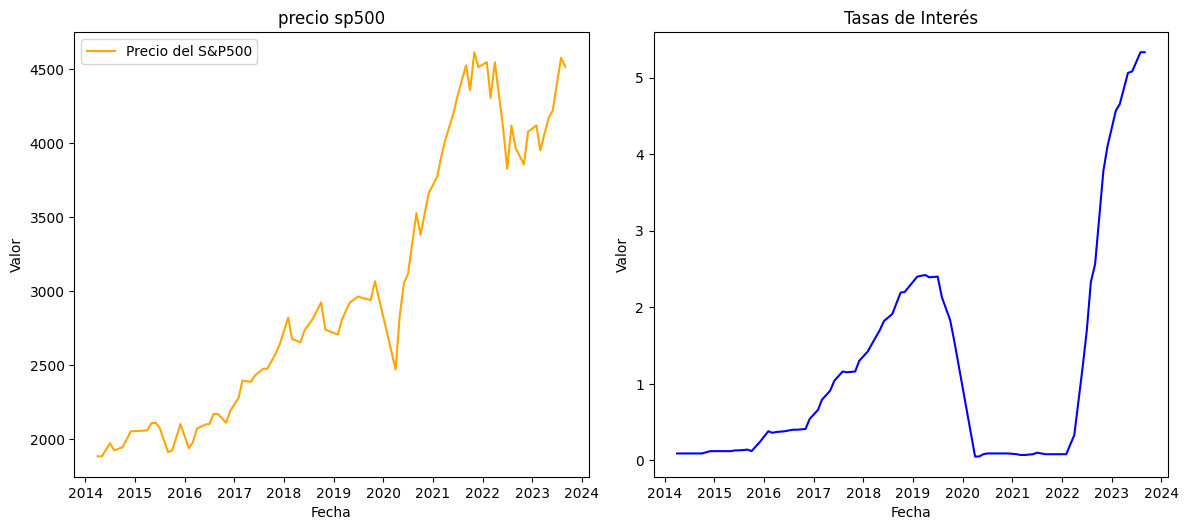

In [ ]:
# Graficar las tasas de interés y el precio del S&P500
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(df['fecha'], df['S&P500'], label='Precio del S&P500', color='orange')

plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('precio sp500')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df['fecha'], df['FEDFUNDS'], label='Tasas de Interés', color='blue')

plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Tasas de Interés')

plt.tight_layout()
plt.show()

**GRAFICO DE LINEAS CON AMBAS VARIABLES JUNTAS**

<ipython-input-701-58351cc1ac76>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['S&P500', 'FEDFUNDS']] = scaler.fit_transform(df2[['S&P500', 'FEDFUNDS']])


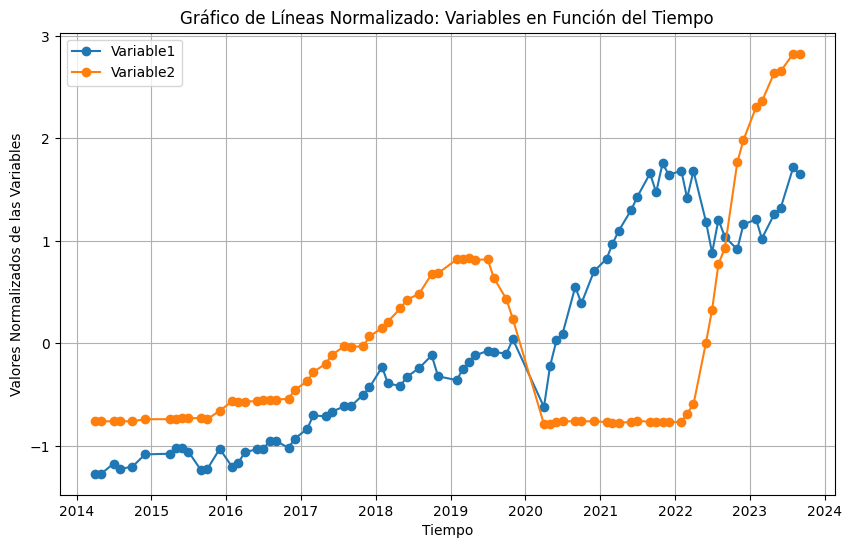

In [ ]:
df2 = df

scaler = StandardScaler()
df2[['S&P500', 'FEDFUNDS']] = scaler.fit_transform(df2[['S&P500', 'FEDFUNDS']])

plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si es necesario
plt.plot(df2['fecha'], df2['S&P500'], label='Variable1', marker='o')
plt.plot(df2['fecha'], df2['FEDFUNDS'], label='Variable2', marker='o')

# Configurar el gráfico
plt.title('Gráfico de Líneas Normalizado: Variables en Función del Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Valores Normalizados de las Variables')
plt.legend()
plt.grid(True)
plt.show()


GRAFICO DE LINEAS: MERCADO BAJISTA

En este caso aíslo un rango de fechas en donde se observa de forma literal la correlacion inversa entre las 2 variables. Al terminar el ciclo de 0 puntos en las tasas de interes y comenzar a subirlas automaticamente el mercado cambia de tendencia a bajista.

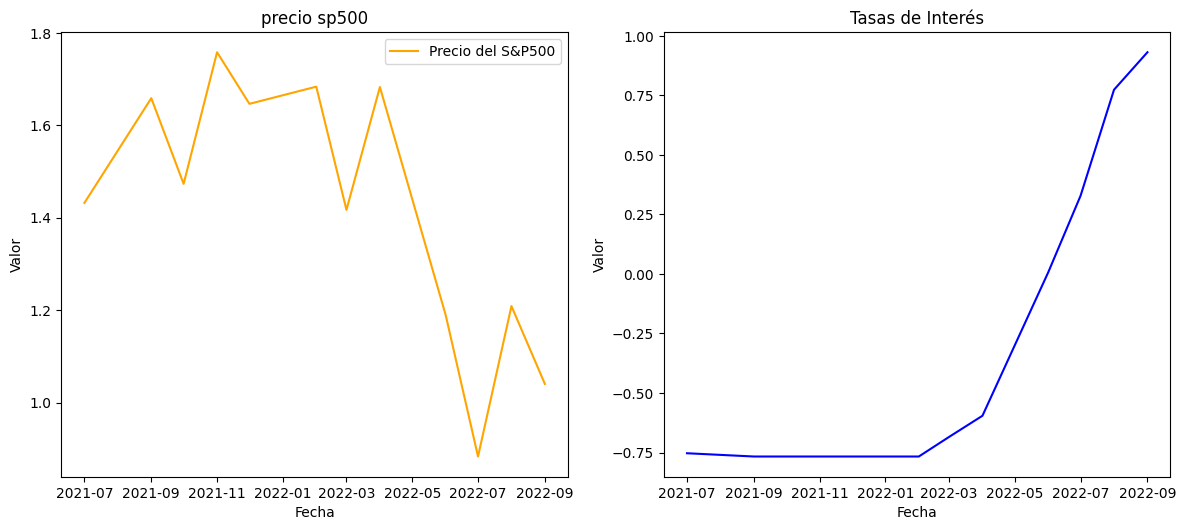

In [ ]:
fecha_inicio = '2021-07'
fecha_fin = '2022-10'

df_rango_fechas_bajista = df[(df['fecha'] >= fecha_inicio) & (df['fecha'] <= fecha_fin)]

# Graficar las tasas de interés y el precio del S&P500
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(df_rango_fechas_bajista['fecha'], df_rango_fechas_bajista['S&P500'], label='Precio del S&P500', color='orange')

plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('precio sp500')
plt.legend()


plt.subplot(2, 2, 2)
plt.plot(df_rango_fechas_bajista['fecha'], df_rango_fechas_bajista['FEDFUNDS'], label='Tasas de Interés', color='blue')

plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Tasas de Interés')

plt.tight_layout()
plt.show()

GRAFICO DE LINEAS: MERCADO ALCISTA

En este caso se logra diferenciar como la reduccion de la tasa de interes a valores cercanos a 0 y la mantencion de dicho valor en 0, impulsa el precio al alza generando un nuevo mercado alcista


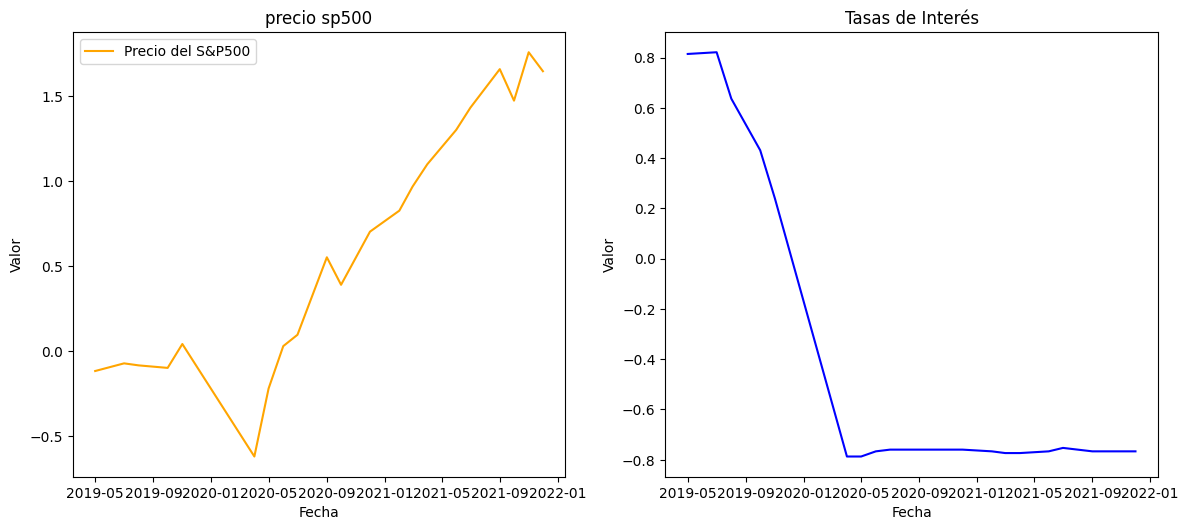

In [ ]:
fecha_inicio = '2019-05'
fecha_fin = '2022-01'

df_rango_fecha_alcista = df[(df['fecha'] >= fecha_inicio) & (df['fecha'] <= fecha_fin)]

# Graficar las tasas de interés y el precio del S&P500
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(df_rango_fecha_alcista['fecha'], df_rango_fecha_alcista['S&P500'], label='Precio del S&P500', color='orange')

plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('precio sp500')
plt.legend()


plt.subplot(2, 2, 2)
plt.plot(df_rango_fecha_alcista['fecha'], df_rango_fecha_alcista['FEDFUNDS'], label='Tasas de Interés', color='blue')

plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Tasas de Interés')

plt.tight_layout()
plt.show()

**ANALISIS MULTIVARIADO**

MATRIZ DE COVARIANZA

Mediante este analisis busco confirmar la correlacion inversa de las variables interpretada en los graficos de lineas.
Para esto aplico la matriz de covarianza sobre el dataframe con el rango de fechas sobre mercado bajista y alcista, obteniendo valores negativos altos entre ambas variables confirmando dicha correlacion inversa.

<ipython-input-704-4edd717d4ccd>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cov_matrix = df_rango_fecha_alcista.cov()


             FEDFUNDS    S&P500  CaroOBarato
FEDFUNDS     0.362978 -0.228420    -0.258276
S&P500      -0.228420  0.548447     0.168441
CaroOBarato -0.258276  0.168441     0.190476


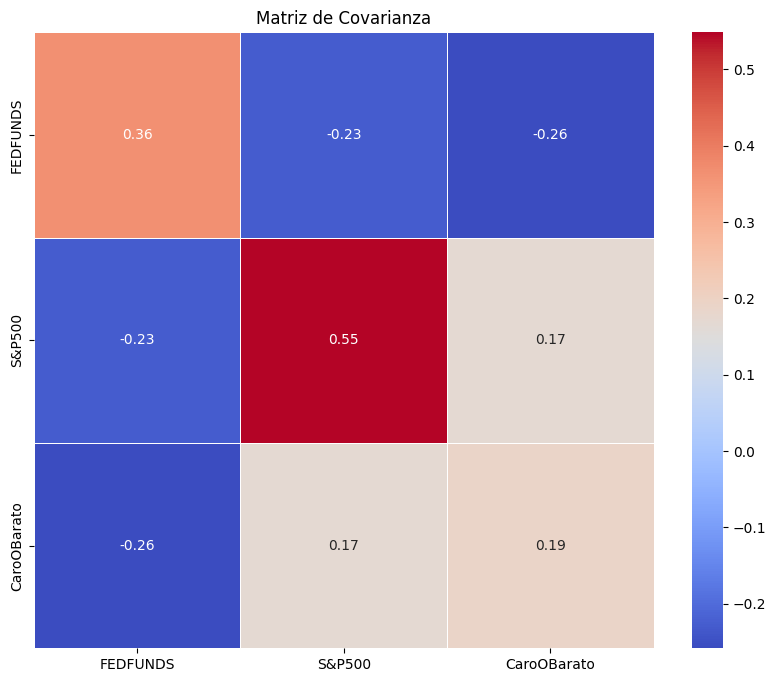

In [ ]:
cov_matrix = df_rango_fecha_alcista.cov()
print(cov_matrix)
#GRAFICAR COVARIANZA

plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Matriz de Covarianza")
plt.show()

<ipython-input-705-cc004aeb8672>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cov_matrix = df_rango_fechas_bajista.cov()


             FEDFUNDS    S&P500  CaroOBarato
FEDFUNDS     0.425466 -0.155074    -0.301340
S&P500      -0.155074  0.081255     0.124484
CaroOBarato -0.301340  0.124484     0.242424


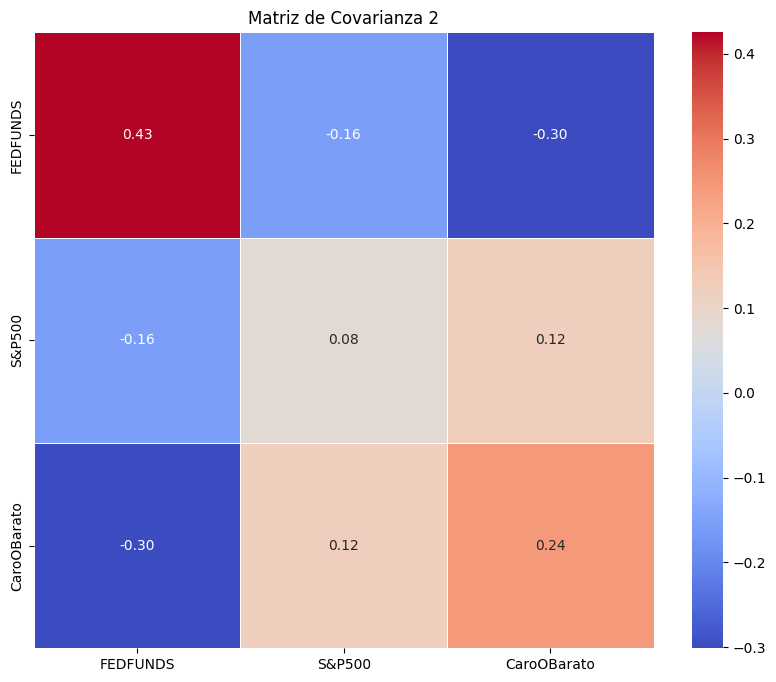

In [ ]:
cov_matrix = df_rango_fechas_bajista.cov()
print(cov_matrix)
#GRAFICAR COVARIANZA

plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Matriz de Covarianza 2")
plt.show()

**MATRIZ DE CORRELACION**

Luego decido aplicar analisis de correlacion ya que este es mas preciso para confirmar la correlacion entre 2 variables.
El resultado de esta nueva matriz corrobora dicha correlacion negativa, ya que un valor negativo sugiere que cuando la tasa de fondos federales aumenta, el valor del índice S&P 500 tiende a disminuir, y viceversa.

In [ ]:
correlacion_matrix = df_rango_fecha_alcista.corr()
correlacion_matrix.head()


<ipython-input-706-a441d3c0a4e7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion_matrix = df_rango_fecha_alcista.corr()


,FEDFUNDS,S&P500,CaroOBarato
FEDFUNDS,1.000000,-0.511949,-0.982255
S&P500,-0.511949,1.000000,0.521146
CaroOBarato,-0.982255,0.521146,1.000000


In [ ]:
correlacion_matrix = df_rango_fechas_bajista.corr()
correlacion_matrix.head()

<ipython-input-707-0d4cd8c3aa31>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion_matrix = df_rango_fechas_bajista.corr()


,FEDFUNDS,S&P500,CaroOBarato
FEDFUNDS,1.000000,-0.834027,-0.938288
S&P500,-0.834027,1.000000,0.886951
CaroOBarato,-0.938288,0.886951,1.000000


# REGRESION LOGISTICA (revisar)

<ipython-input-708-fce830d08899>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["S&P500"] = pd.to_numeric(df["S&P500"], errors='coerce')
<ipython-input-708-fce830d08899>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CaroOBarato"] = pd.to_numeric(df["CaroOBarato"], errors='coerce')
<ipython-input-708-fce830d08899>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

Precisión del modelo: 0.6875
Matriz de Confusión:



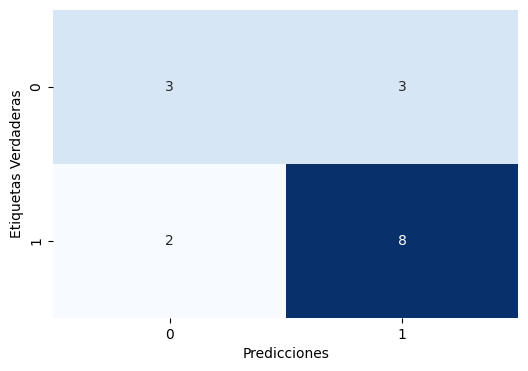

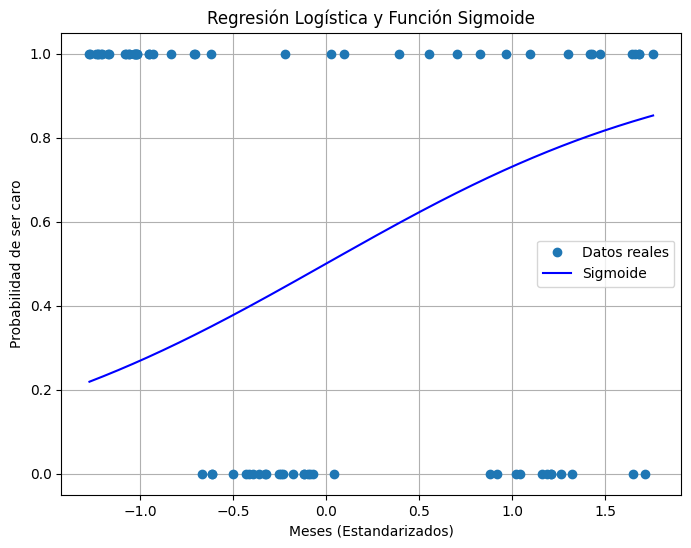

In [ ]:
df["S&P500"] = pd.to_numeric(df["S&P500"], errors='coerce')

#Cambiar el tipo de dato de la columna "CaroOBarato" a numérico
df["CaroOBarato"] = pd.to_numeric(df["CaroOBarato"], errors='coerce')

#Cambiar el tipo de dato de la columna "fecha" a datetime
df["fecha"] = pd.to_datetime(df["fecha"], errors='coerce')

fechas = df.pop('fecha')

#Estandarizacion de las variables

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

df['fecha'] = fechas

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df[['S&P500']]
y = df['CaroOBarato']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión logística
modelo = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predicciones = modelo.predict(X_test)

#______________EVALUAR RENDIMIENTO (Metricas de evaluacion)________________

# Calcular la precisión del modelo
precision = accuracy_score(y_test, predicciones)
print("Precisión del modelo:", precision)

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(y_test, predicciones)
print("Matriz de Confusión:\n")

# Visualizar la matriz de confusión (opcional)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicciones")
plt.ylabel("Etiquetas Verdaderas")
plt.show()

#___GRAFICAR CURVA SIGMOIDE______

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#Graficar la función sigmoide
x_range = np.linspace(X.min(), X.max(), 1000)
y_sigmoid = sigmoid(x_range)

plt.figure(figsize=(8, 6))
plt.plot(X, y, 'o', label='Datos reales')
plt.plot(x_range, y_sigmoid, label='Sigmoide', color='b')
plt.xlabel('Meses (Estandarizados)')
plt.ylabel('Probabilidad de ser caro')
plt.title('Regresión Logística y Función Sigmoide')
plt.grid(True)
plt.legend()